In [1]:
import os
import sys
sys.path.append(os.pardir)

In [2]:
cd ..

/home/massquantity/Workspace/DNN_implementation


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

import random
import time
from DNN_implementation.data import cifar_data, mnist_2
from DNN_implementation.model import Network, Network_mini_batch
from DNN_implementation.train import train_DNN_minibatch
from DNN_implementation import Sgd, Momentum, NesterovMomentum, Adam
from DNN_implementation import Sigmoid, ReLU
from DNN_implementation.evaluate import evaluate_batch

In [4]:
def collect_metrics(X_train, y_train, num_epochs, optimizer, batch_size, network, X_test, y_test):
    best_loss = np.infty
    for epoch in range(1, num_epochs + 1):
        random_mask = np.random.choice(len(X_train), len(X_train), replace=False)
        X_train = X_train[random_mask]
        y_train = y_train[random_mask]

        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i: i + batch_size]
            y_batch = y_train[i: i + batch_size]
            grad_w, grad_b = network.backprop(X_batch, y_batch)
            optimizer.update(network.weights, network.biases, grad_w, grad_b)

        train_loss, train_accuracy = evaluate_batch(X_train, y_train, network)
        test_loss, test_accuracy = evaluate_batch(X_test, y_test, network)
        if test_loss < best_loss:
            best_loss = test_loss
            count = 0
        else:
            count += 1

        if count > 10:
            print("Early Stopping in epoch %d !!!" % epoch)
            break
    return train_loss, test_loss

In [5]:
def plot_learning_curve(model, optimizer, num_epochs, batch_size):
    train_total_loss, test_total_loss = [], []
    for m in range(1000, len(X_train) + 5, 2000):
        t0 = time.time()
        network = model
        train_loss, test_loss = collect_metrics(X_train[:m], y_train[:m], num_epochs, optimizer, 
                                              batch_size, network, X_test, y_test)
        del network
        train_total_loss.append(train_loss)
        test_total_loss.append(test_loss)
        print("dataset %d done in %d seconds" % (m, time.time() - t0))
        
    return train_total_loss, test_total_loss

In [6]:
(X_train, y_train), (X_test, y_test) = mnist_2.load_data()
dnn = Network_mini_batch(sizes=[784, 300, 200, 10], activation="relu", dropout_rate=0.0,  # 50
                             weight_initializer="he")
optimizer = Momentum(lr=1e-3, momentum=0.9, batch_size=128)

In [7]:
%time train_loss, test_loss = plot_learning_curve(dnn, optimizer, 500, 128)

Early Stopping in epoch 291 !!!
dataset 1000 done in 113 seconds
Early Stopping in epoch 139 !!!
dataset 3000 done in 77 seconds
Early Stopping in epoch 144 !!!
dataset 5000 done in 108 seconds
Early Stopping in epoch 58 !!!
dataset 7000 done in 52 seconds
Early Stopping in epoch 120 !!!
dataset 9000 done in 131 seconds
Early Stopping in epoch 50 !!!
dataset 11000 done in 64 seconds
Early Stopping in epoch 68 !!!
dataset 13000 done in 99 seconds
Early Stopping in epoch 69 !!!
dataset 15000 done in 117 seconds
Early Stopping in epoch 76 !!!
dataset 17000 done in 143 seconds
Early Stopping in epoch 31 !!!
dataset 19000 done in 64 seconds
Early Stopping in epoch 54 !!!
dataset 21000 done in 125 seconds
Early Stopping in epoch 52 !!!
dataset 23000 done in 131 seconds
Early Stopping in epoch 64 !!!
dataset 25000 done in 175 seconds
Early Stopping in epoch 56 !!!
dataset 27000 done in 164 seconds
Early Stopping in epoch 63 !!!
dataset 29000 done in 212 seconds
Early Stopping in epoch 24 !!!


In [8]:
train_loss, test_loss

([0.101121809955731,
  0.08520102390114788,
  0.046996480272755756,
  0.04958429403122269,
  0.028605844942906453,
  0.027686382917688407,
  0.019596206517209346,
  0.014519440341738455,
  0.010401050530462528,
  0.012004373939538463,
  0.009750628504878208,
  0.008240889476145421,
  0.006165761932630694,
  0.006399822218456705,
  0.004648436920435934,
  0.004938750132254783,
  0.004577416335141461,
  0.006196543096267851,
  0.00592354463492002,
  0.004643280976314022,
  0.004737281757389114,
  0.004781766826372923,
  0.005285689756371802,
  0.0039664455080895104,
  0.0050331070174054245,
  0.003986919962088532,
  0.004505813422341255,
  0.0039242064707950995,
  0.0037531600754213247,
  0.00384272983358313],
 [0.41584657957624915,
  0.314637859538751,
  0.26958879761468296,
  0.24525790340483877,
  0.21489595366904787,
  0.1986503309578207,
  0.18006446700129344,
  0.16194448931174205,
  0.1504266704465361,
  0.14320212103918728,
  0.1348481109665781,
  0.13031366260339003,
  0.1238738

Text(0,0.5,'accuracy')

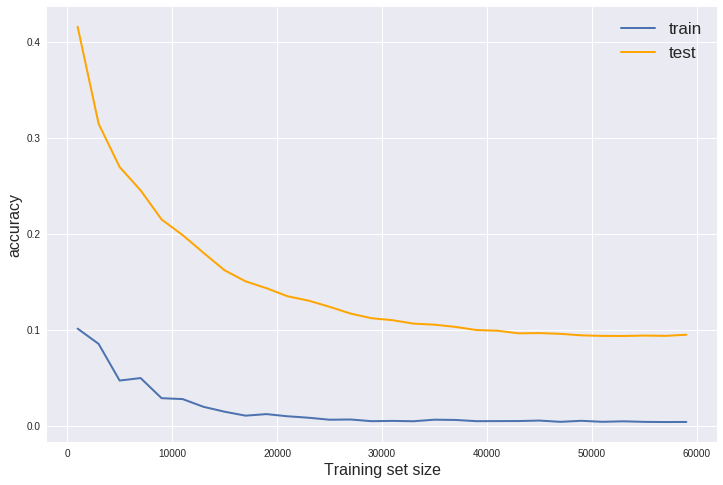

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(range(1000, len(X_train) + 5, 2000), train_loss, linewidth=2, label="train")
plt.plot(range(1000, len(X_train) + 5, 2000), test_loss, color="orange", linewidth=2, label="test")
# plt.xtick_labels("3")
# xticks([]), yticks([])
plt.legend(loc="best", fontsize=17)
plt.xlabel("Training set size", fontsize=16)
plt.ylabel("loss", fontsize=16)